In [1]:
library(dplyr)
library(tsibble)
library(fpp3) 
options(repr.plot.width=25)

calendar <- read.csv('Datasets/calendar_afcs2024.csv')
prices <- read.csv('Datasets/sell_prices_afcs2024.csv')
sales_train <- read.csv('Datasets/sales_train_validation_afcs2024.csv')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tsibble' was built under R version 4.4.2"
Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: 'tsibble'


The following objects are masked from 'package:base':

    intersect, setdiff, union


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────── fpp3 1.0.1 ──

✔ tibble      3.2.1.9033     ✔ tsibbledata 0.4.1     
✔ tidyr       1.3.1          ✔ feasts      0.4.1     
✔ lubridate   1.9.3          ✔ fable       0.4.1     
✔ ggplot2     3.5.1          

Warning message:
"package 'tsibbledata' was built under R version 4.4.2"
Warning message:
"package 'feasts' was built under R version 4.4.2"
Warning message:
"package 'fabletools' was built 

In [2]:
# Transpose sale CSV to match forcasting-usable format
# After transpose, ensure datatypes are int, surpress row names being selected in df

sales_transposed <- t(sales_train)
sales_df <- as.data.frame(sales_transposed[-1,]) %>% mutate_all(as.integer)
colnames(sales_df) <- sales_transposed[1,]
row.names(sales_df) <- NULL

#sales_df <- tibble::rownames_to_column(sales_df, "Day")
#sales_ts <- as_tsibble(sales_df, index = Day)
#sales_ts <- as_tsibble(sales_df)

# Count totals over the rows, just as a possible informative data about overall food items sales
# Add day counter to both df's to make merging possible (otherwise no key)

sales_df$total <- rowSums(sales_df)
sales_df$day <- 1:nrow(sales_df)
calendar$day <- 1:nrow(calendar)

In [3]:
# Merge dataframes and convert to tsibble 

calendar_sales <- merge(calendar,sales_df)
calendar_sales <- calendar_sales %>% as_tsibble(index = day)
calendar_sales$is_event <- ifelse(calendar_sales$event_name_1 != "NA", 1, 0)


In [4]:
calendar_sales

day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,⋯,3,0,7,0,0,0,0,0,1686,NA
2,1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,⋯,2,0,5,0,1,0,0,0,1661,NA
3,1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,⋯,1,0,5,0,0,0,0,0,1189,NA
4,2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,⋯,3,0,3,0,1,2,0,0,1137,NA
5,2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,⋯,0,0,0,0,0,1,0,0,954,NA
6,2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,⋯,0,0,3,0,2,1,0,0,1598,NA
7,2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,⋯,1,0,0,0,0,0,0,0,1107,NA
8,2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,⋯,0,0,1,0,1,0,0,0,1680,NA
9,2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,⋯,1,0,7,0,1,1,0,0,1660,1


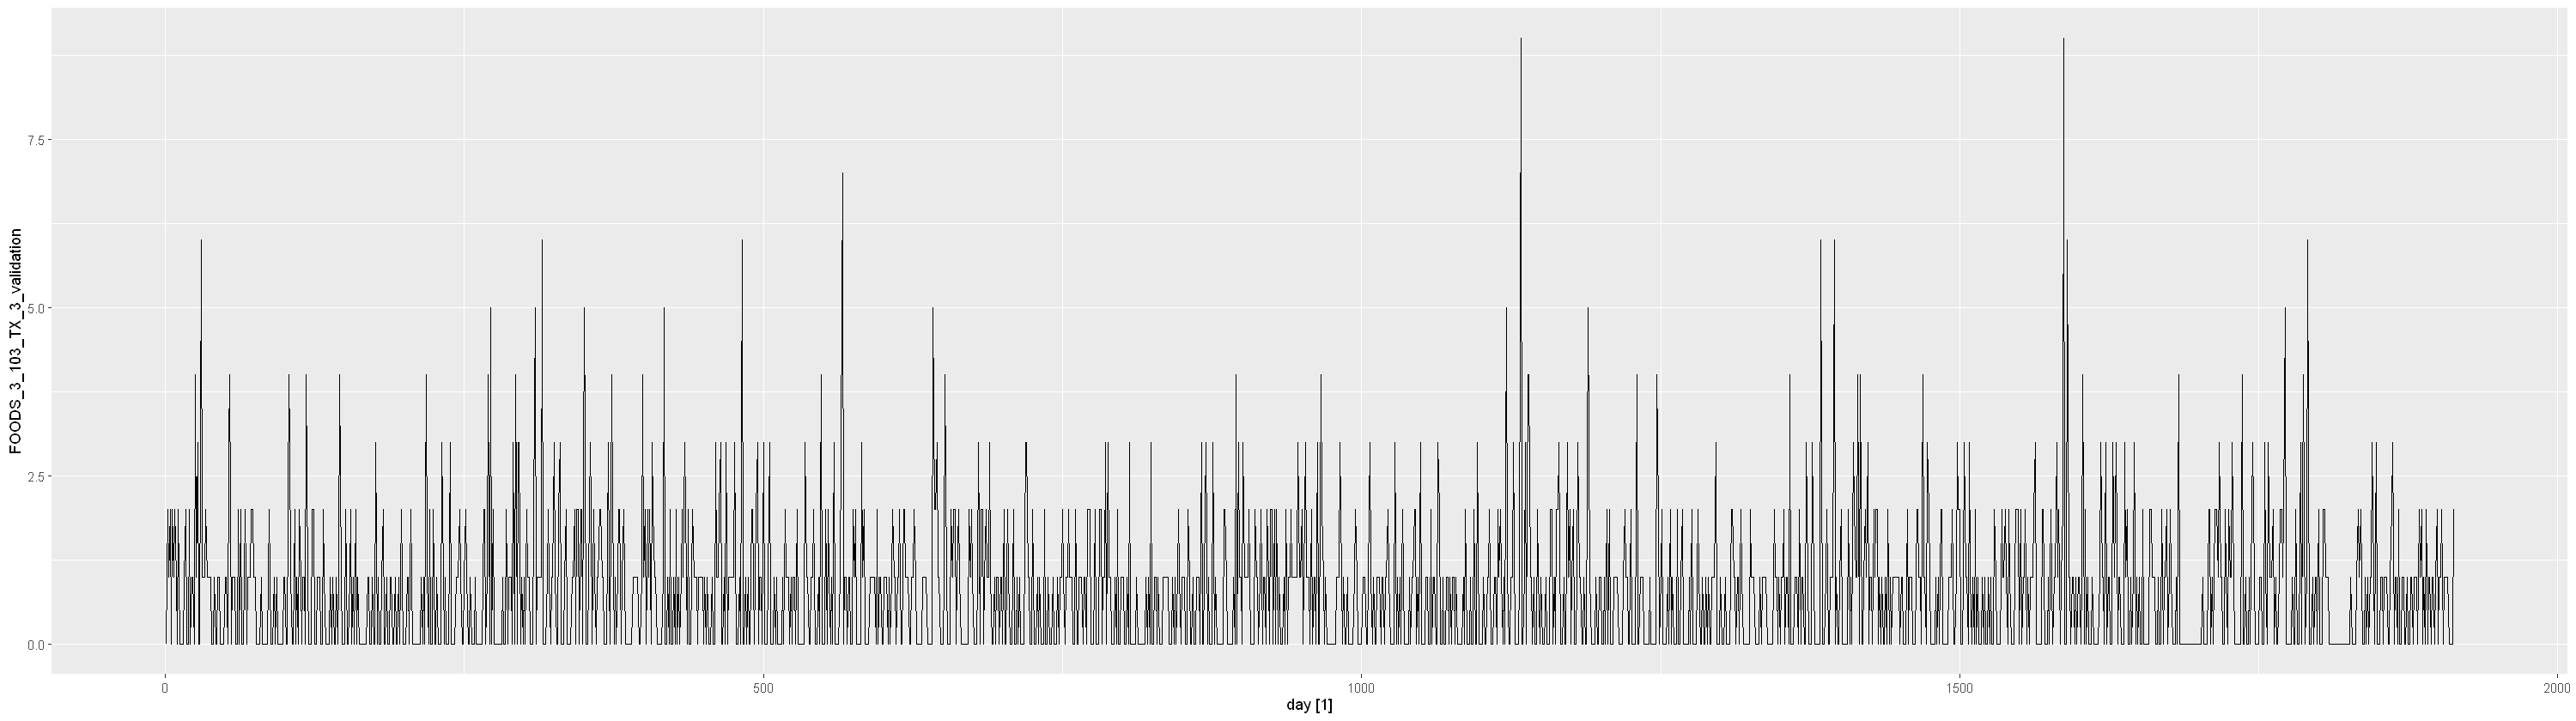

In [88]:
# Overall Food sales, informative. See cyclic behavior 

calendar_sales %>% autoplot(FOODS_3_103_TX_3_validation)

In [6]:
is_regular(calendar_sales)

[1] TRUE

In [7]:
# Probably closed on christmas, sales is are aprox 0.
# Positive outlier on jun 15 2015, 4027 sales for some reason

calendar_sales[calendar_sales$total <=5, ]
calendar_sales[calendar_sales$total >=3500, ]

day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
331,12/25/2011,11148,Sunday,2,12,2011,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1
697,12/25/2012,11248,Tuesday,4,12,2012,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1
1062,12/25/2013,11348,Wednesday,5,12,2013,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,1,1
1427,12/25/2014,11447,Thursday,6,12,2014,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,4,1
1792,12/25/2015,11547,Friday,7,12,2015,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1


day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1599,6/15/2015,11520,Monday,3,6,2015,NA,NA,NA,⋯,1,1,4,0,0,0,2,0,4027,NA


In [8]:
calendar

date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9


In [78]:
calendar2 <- calendar 
calendar2$name <- 1:nrow(calendar)
sales <- sales_train %>% pivot_longer (2:ncol(sales_train)) 
sales$name <- gsub("d_", "", sales$name)
sales$id <- gsub("_TX_3_validation", "" ,sales$id)
sales$name <- as.integer(sales$name)

sales
calendar2

id,name,value
<chr>,<int>,<int>
FOODS_3_001,1,0
FOODS_3_001,2,2
FOODS_3_001,3,1
FOODS_3_001,4,3
FOODS_3_001,5,0
FOODS_3_001,6,0
FOODS_3_001,7,1
FOODS_3_001,8,0
FOODS_3_001,9,2


date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day,name
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9,9


In [79]:
sales
calendar2

id,name,value
<chr>,<int>,<int>
FOODS_3_001,1,0
FOODS_3_001,2,2
FOODS_3_001,3,1
FOODS_3_001,4,3
FOODS_3_001,5,0
FOODS_3_001,6,0
FOODS_3_001,7,1
FOODS_3_001,8,0
FOODS_3_001,9,2


date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day,name
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9,9


In [85]:
calendar2_sales <- left_join(sales,calendar2, by='name') 
calendar2_sales$date <- as.Date(calendar2_sales$date, format = "%m/%d/%Y")
calendar2_sales <- calendar2_sales %>% as_tsibble(index = date , key = id)
calendar2_sales <- left_join(calendar2_sales, prices, by = c("wm_yr_wk" = "wm_yr_wk", "id"="item_id"))
calendar2_sales$is_event <- ifelse(calendar2_sales$event_name_1 != "NA", 1, 0)

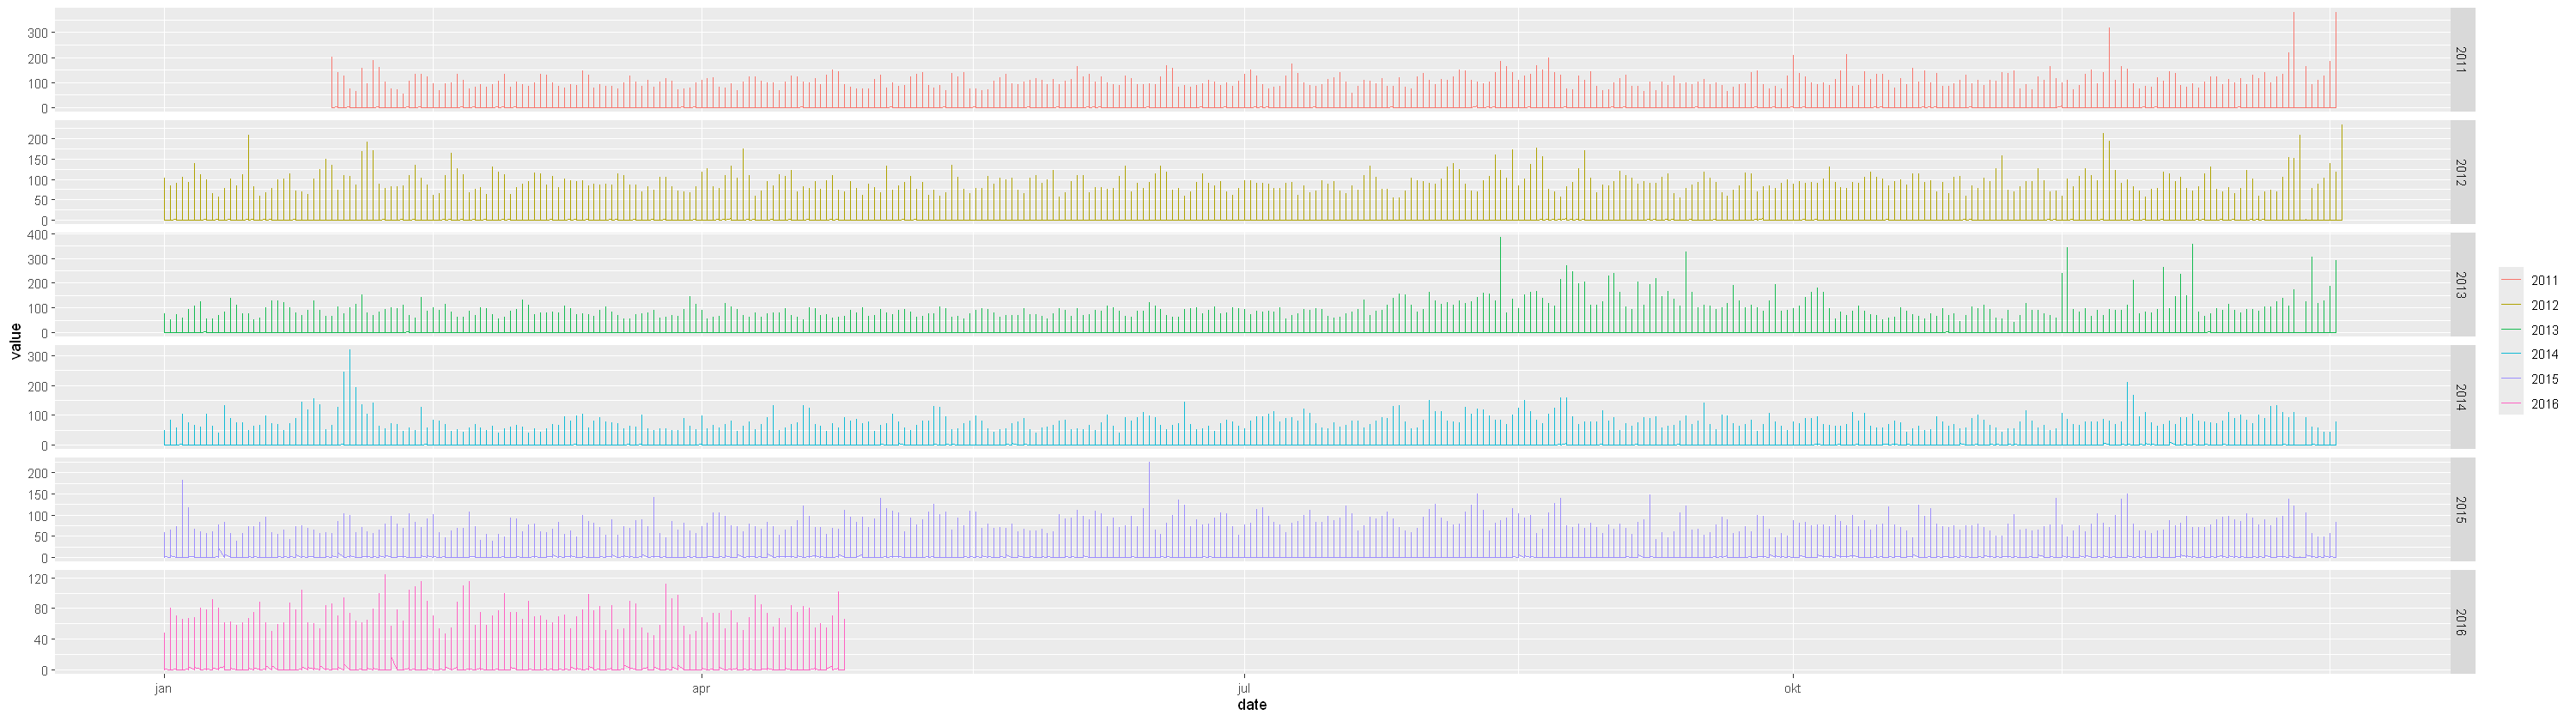

In [72]:
gg_season(calendar2_sales, y = value)

In [75]:
gg_lag(calendar2_sales, y = value)

ERROR: [1m[33mError[39m in `gg_lag()`:[22m
[33m![39m The data provided to contains more than one time series. Please filter a single time series to use `gg_lag()`


In [83]:
calendar2_sales

id,name,value,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day,store_id,sell_price
<chr>,<int>,<int>,<date>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
FOODS_3_001,1,0,2011-01-29,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1,TX_3,2.28
FOODS_3_001,2,2,2011-01-30,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2,TX_3,2.28
FOODS_3_001,3,1,2011-01-31,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3,TX_3,2.28
FOODS_3_001,4,3,2011-02-01,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4,TX_3,2.28
FOODS_3_001,5,0,2011-02-02,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5,TX_3,2.28
FOODS_3_001,6,0,2011-02-03,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6,TX_3,2.28
FOODS_3_001,7,1,2011-02-04,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7,TX_3,2.28
FOODS_3_001,8,0,2011-02-05,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8,TX_3,2.28
FOODS_3_001,9,2,2011-02-06,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9,TX_3,2.28


In [76]:
prices

store_id,item_id,wm_yr_wk,sell_price
<chr>,<chr>,<int>,<dbl>
TX_3,FOODS_3_001,11101,2.28
TX_3,FOODS_3_001,11102,2.28
TX_3,FOODS_3_001,11103,2.28
TX_3,FOODS_3_001,11104,2.28
TX_3,FOODS_3_001,11105,2.28
TX_3,FOODS_3_001,11106,2.28
TX_3,FOODS_3_001,11107,2.28
TX_3,FOODS_3_001,11108,2.28
TX_3,FOODS_3_001,11109,2.28
